In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('data/Attrition_Case_Study.csv')

In [3]:
df.head(20)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,0,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,0,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,0,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,0,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,0,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.set_index('EmployeeNumber', inplace = True)

In [5]:
df.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.dtypes

Attrition                    int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

## data consist of 35 columns, Y => Attrition , No of rows => 1470

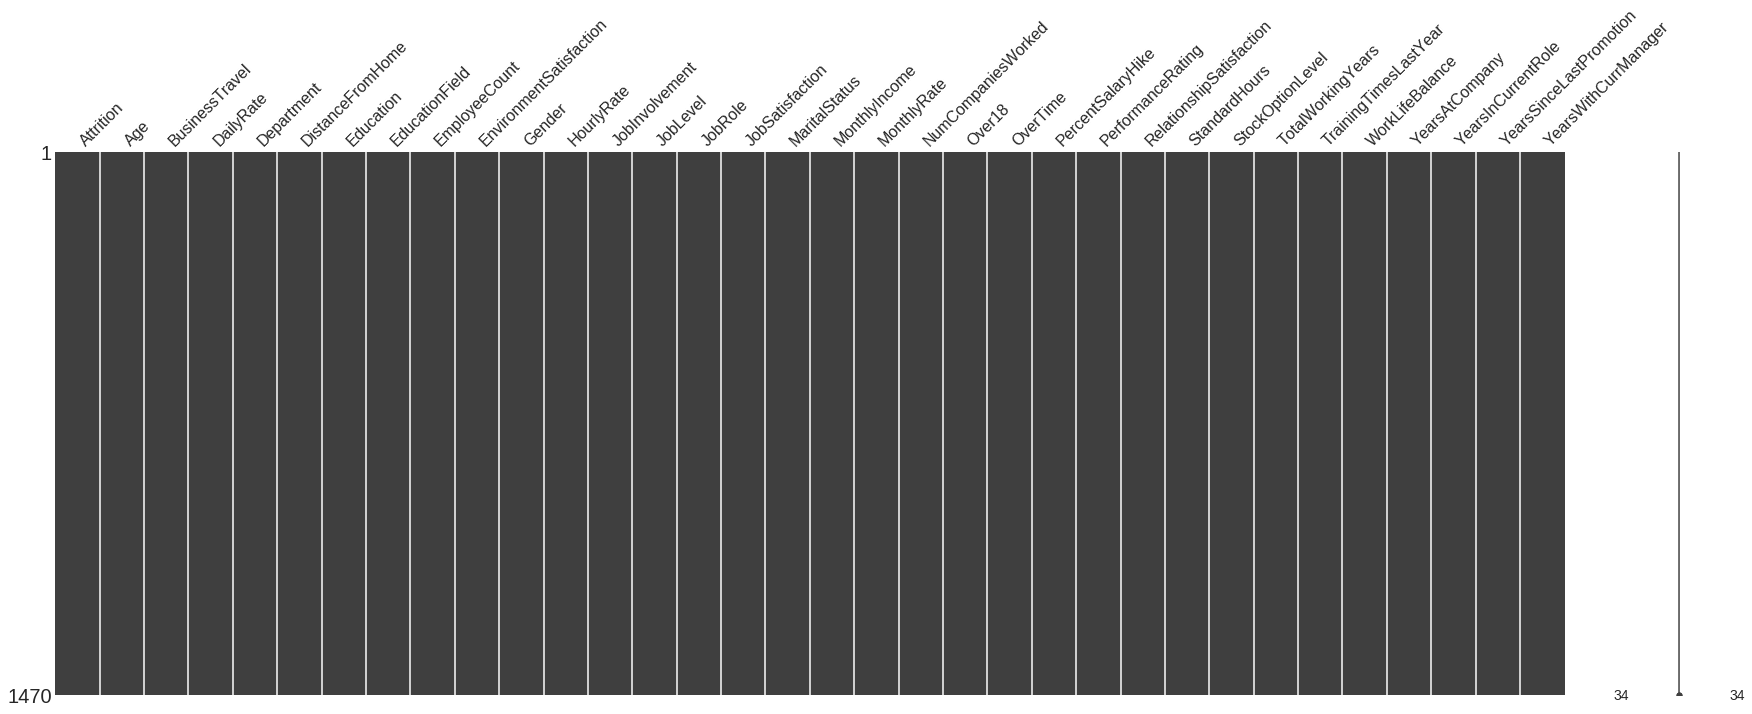

In [7]:
missingno.matrix(df,figsize=(30,10))

In [8]:
df.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [9]:
df=df.drop("Over18",axis=1)

In [10]:
df.dtypes

Attrition                    int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [11]:
df.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
df_bin = pd.DataFrame()   ## for storting discrete values
df_con= pd.DataFrame()   ## for selecting features from df ( main dataframe)

In [13]:
df_con['Attrition']= df['Attrition']
df_bin['Attrition']=df['Attrition']

In [14]:
df.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

[]

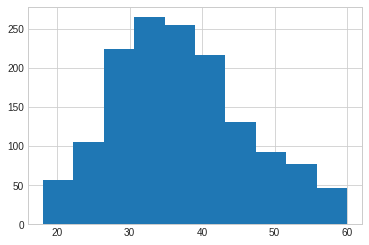

In [15]:
df.Age.hist()
plt.plot()

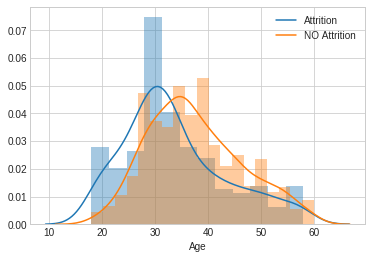

In [16]:
sns.distplot(df.loc[df['Attrition'] == 1]['Age'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['Age'], kde_kws={'label': 'NO Attrition'});

# age nearby 35 and lower tends to attrition

In [17]:
len(df['Age'].unique())

43

In [18]:
df_con['Age']= df['Age']
df_bin['Age']=pd.cut(df['Age'],bins=3)

In [19]:
df_con.head(15)

,Attrition,Age
EmployeeNumber,,
1,1,41
2,0,49
4,1,37
5,0,33
7,0,27
8,0,32
10,0,59
11,0,30
12,0,38


In [20]:
df_bin.head(15)

,Attrition,Age
EmployeeNumber,,
1,1,"(32.0, 46.0]"
2,0,"(46.0, 60.0]"
4,1,"(32.0, 46.0]"
5,0,"(32.0, 46.0]"
7,0,"(17.958, 32.0]"
8,0,"(17.958, 32.0]"
10,0,"(46.0, 60.0]"
11,0,"(17.958, 32.0]"
12,0,"(32.0, 46.0]"


In [21]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [22]:
df_con['BusinessTravel']=df['BusinessTravel'].astype('category')  # changed as category 
df_bin['BusinessTravel']= df['BusinessTravel'].astype('category') 

In [23]:
df_con.head()

,Attrition,Age,BusinessTravel
EmployeeNumber,,,
1,1,41,Travel_Rarely
2,0,49,Travel_Frequently
4,1,37,Travel_Rarely
5,0,33,Travel_Frequently
7,0,27,Travel_Rarely


In [24]:
df_bin.head()

,Attrition,Age,BusinessTravel
EmployeeNumber,,,
1,1,"(32.0, 46.0]",Travel_Rarely
2,0,"(46.0, 60.0]",Travel_Frequently
4,1,"(32.0, 46.0]",Travel_Rarely
5,0,"(32.0, 46.0]",Travel_Frequently
7,0,"(17.958, 32.0]",Travel_Rarely


In [25]:
df.DailyRate.value_counts()

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64

In [26]:
df.DailyRate.min()

102

[]

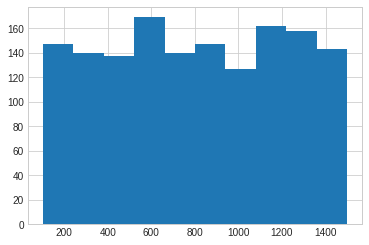

In [27]:
df.DailyRate.hist()
plt.plot()

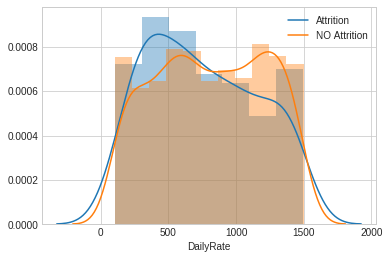

In [28]:
sns.distplot(df.loc[df['Attrition'] == 1]['DailyRate'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['DailyRate'], kde_kws={'label': 'NO Attrition'});

## Low attrition rate found at higher Daily rate

In [29]:
df_con['DailyRate']=df['DailyRate']

In [30]:
df_bin['DailyRate']=pd.cut(df['DailyRate'],bins=5)

In [31]:
df_bin.head()

,Attrition,Age,BusinessTravel,DailyRate
EmployeeNumber,,,,
1,1,"(32.0, 46.0]",Travel_Rarely,"(940.2, 1219.6]"
2,0,"(46.0, 60.0]",Travel_Frequently,"(100.603, 381.4]"
4,1,"(32.0, 46.0]",Travel_Rarely,"(1219.6, 1499.0]"
5,0,"(32.0, 46.0]",Travel_Frequently,"(1219.6, 1499.0]"
7,0,"(17.958, 32.0]",Travel_Rarely,"(381.4, 660.8]"


In [32]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [33]:
df_con['Department']= df['Department'].astype('category')

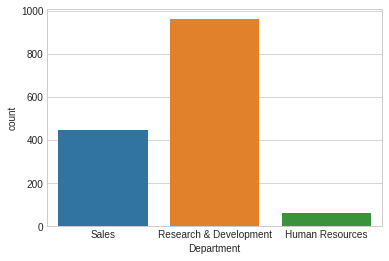

In [34]:
sns.countplot(df.Department)

In [35]:
df_con['Department']=df['Department'].astype('category')
df_bin['Department']= df['Department'].astype('category')

In [36]:
df.DistanceFromHome.value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

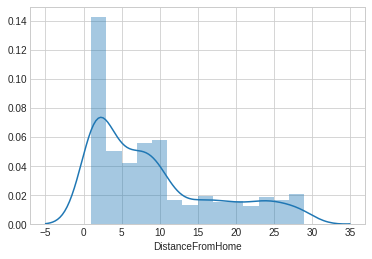

In [37]:
sns.distplot(df.DistanceFromHome)

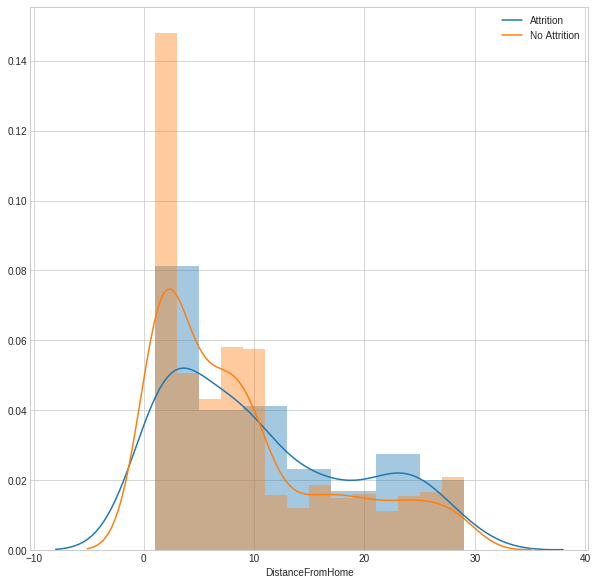

In [38]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Attrition'] == 1]['DistanceFromHome'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['DistanceFromHome'], kde_kws={'label': 'No Attrition'});

# far employee are more probable to attrition than less distance employee

In [39]:
df_con['DistanceFromHome']=df['DistanceFromHome']
df_bin['DistanceFromHome']= pd.cut(df['DistanceFromHome'],bins=3)

In [40]:
df_bin.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome
EmployeeNumber,,,,,,
1,1,"(32.0, 46.0]",Travel_Rarely,"(940.2, 1219.6]",Sales,"(0.972, 10.333]"
2,0,"(46.0, 60.0]",Travel_Frequently,"(100.603, 381.4]",Research & Development,"(0.972, 10.333]"
4,1,"(32.0, 46.0]",Travel_Rarely,"(1219.6, 1499.0]",Research & Development,"(0.972, 10.333]"
5,0,"(32.0, 46.0]",Travel_Frequently,"(1219.6, 1499.0]",Research & Development,"(0.972, 10.333]"
7,0,"(17.958, 32.0]",Travel_Rarely,"(381.4, 660.8]",Research & Development,"(0.972, 10.333]"


In [41]:
df.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [42]:
df_con['Education']=df['Education']
df_bin['Education']=df['Education']

In [43]:
df_bin.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education
EmployeeNumber,,,,,,,
1,1,"(32.0, 46.0]",Travel_Rarely,"(940.2, 1219.6]",Sales,"(0.972, 10.333]",2
2,0,"(46.0, 60.0]",Travel_Frequently,"(100.603, 381.4]",Research & Development,"(0.972, 10.333]",1
4,1,"(32.0, 46.0]",Travel_Rarely,"(1219.6, 1499.0]",Research & Development,"(0.972, 10.333]",2
5,0,"(32.0, 46.0]",Travel_Frequently,"(1219.6, 1499.0]",Research & Development,"(0.972, 10.333]",4
7,0,"(17.958, 32.0]",Travel_Rarely,"(381.4, 660.8]",Research & Development,"(0.972, 10.333]",1


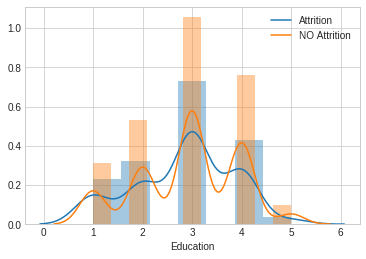

In [44]:
sns.distplot(df.loc[df['Attrition'] == 1]['Education'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['Education'], kde_kws={'label': 'NO Attrition'});


In [45]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [46]:
df_con['EducationField']=df['EducationField'].astype('category')

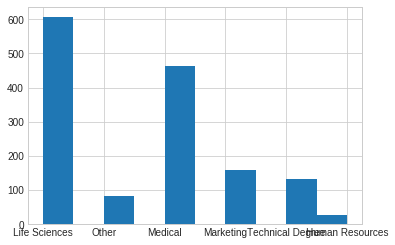

In [47]:
df.EducationField.hist()

In [48]:
df_bin['EducationField']= df['EducationField'].astype('category')

In [49]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

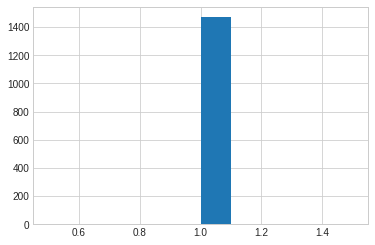

In [50]:
df.EmployeeCount.hist()

# EmployeeCount is not taken into account for df_con as it has 1 for all rows

In [51]:
df.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [52]:
df_con['EnvironmentSatisfaction']=df['EnvironmentSatisfaction']
df_bin['EnvironmentSatisfaction']=df['EnvironmentSatisfaction']

# 'EnvironmentSatisfaction' is a ordinal data. 

In [53]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [54]:
df_con['Gender']=df['Gender']
df_bin['Gender'] = df['Gender']
df_bin['Gender'] = np.where(df_bin['Gender'] == 'Female', 1, 0)

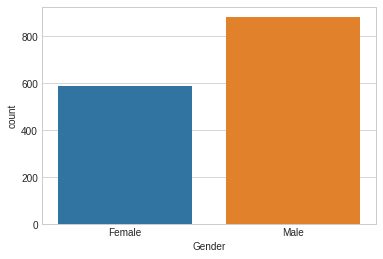

In [55]:
sns.countplot(df['Gender'])

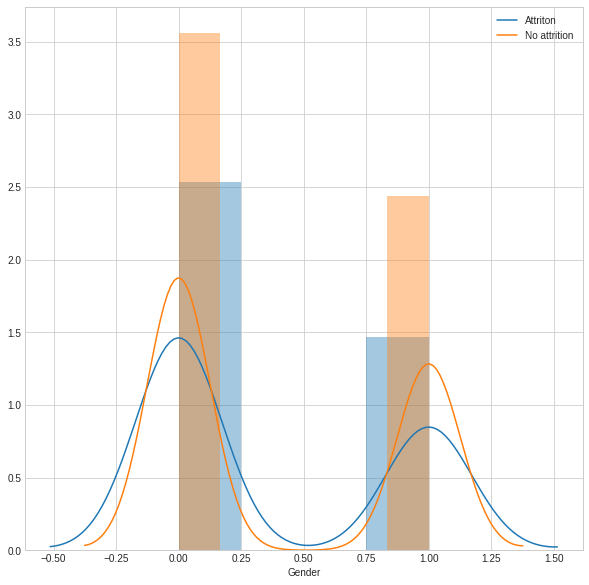

In [56]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Attrition'] == 1]['Gender'], kde_kws={'label': 'Attriton'});
sns.distplot(df_bin.loc[df_bin['Attrition'] == 0]['Gender'], kde_kws={'label': 'No attrition'});

In [57]:
df.HourlyRate.value_counts()

66    29
42    28
98    28
48    28
84    28
      ..
31    15
68    14
53    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

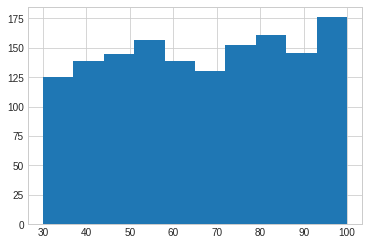

In [58]:
df.HourlyRate.hist()

In [59]:
df_con['HourlyRate']=df['HourlyRate']

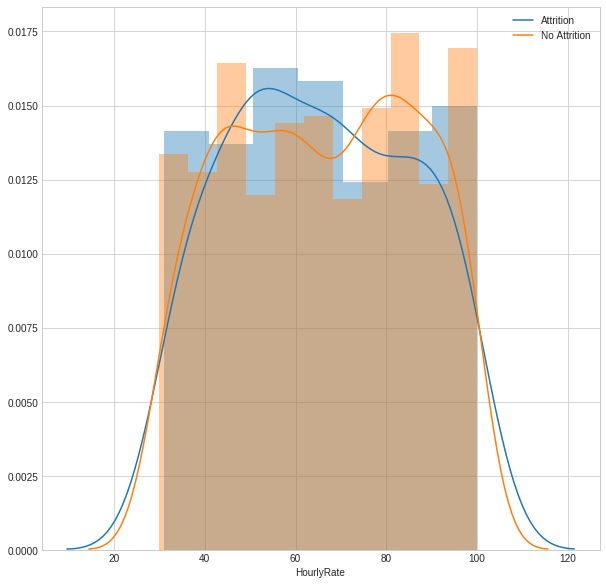

In [60]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Attrition'] == 1]['HourlyRate'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['HourlyRate'], kde_kws={'label': 'No Attrition'});



In [61]:
df_con['HourlyRate']= df['HourlyRate']

In [62]:
df_bin['HourlyRate']=pd.cut(df['HourlyRate'],bins=5)

In [63]:
df.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

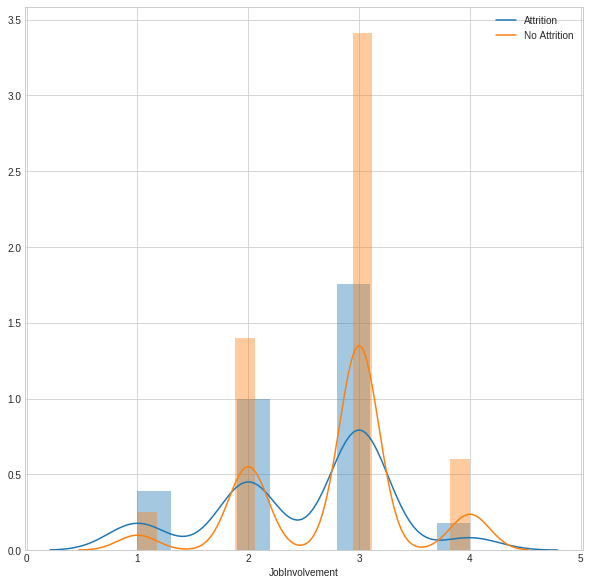

In [64]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Attrition'] == 1]['JobInvolvement'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['JobInvolvement'], kde_kws={'label': 'No Attrition'});


In [65]:
df_con['JobInvolvement']=df['JobInvolvement']
df_bin['JobInvolvement']=df['JobInvolvement']

In [66]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

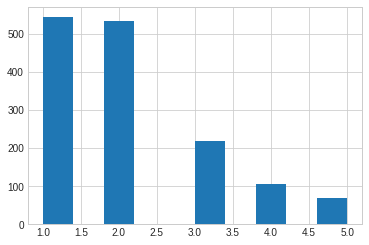

In [67]:
df['JobLevel'].hist()

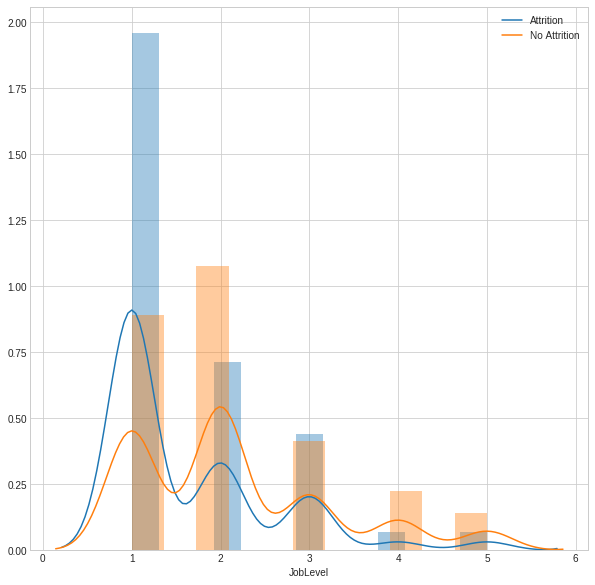

In [68]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Attrition'] == 1]['JobLevel'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['JobLevel'], kde_kws={'label': 'No Attrition'});


## More attrition rate is observed in level 1 ,2 and 3 level

In [69]:

df_con['JobLevel']=df['JobLevel']
df_bin['JobLevel'] = df['JobLevel']

In [70]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

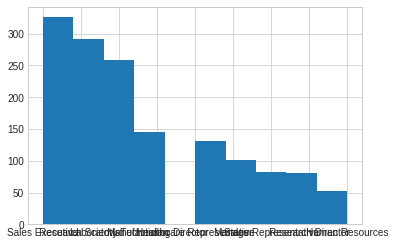

In [71]:
df.JobRole.hist()

In [72]:
df_con['JobRole']=df['JobRole']
df_bin['JobRole']=df['JobRole']

In [73]:
df.JobSatisfaction.value_counts()


4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

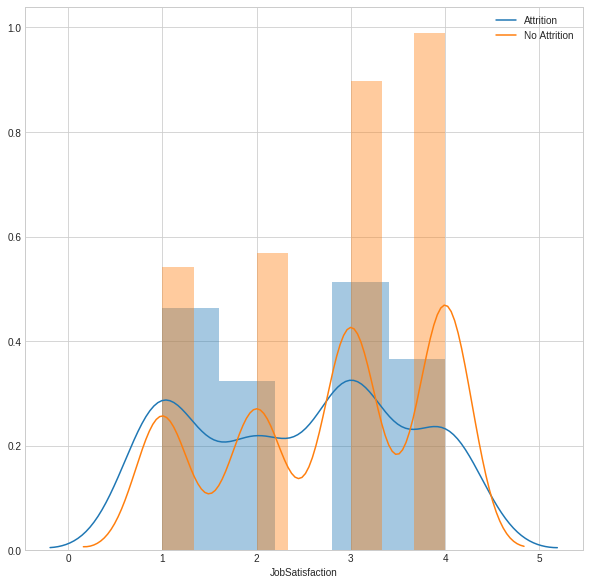

In [74]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Attrition'] == 1]['JobSatisfaction'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['JobSatisfaction'], kde_kws={'label': 'No Attrition'});

In [75]:
df_con['JobSatisfaction']=df['JobSatisfaction']

In [76]:
df_bin['JobSatisfaction']=df['JobSatisfaction']

In [77]:
df_con['MaritalStatus']=df['MaritalStatus']

In [78]:
df_con['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [79]:
df_bin['MaritalStatus']=df['MaritalStatus']

In [80]:
df['MonthlyIncome'].value_counts()

2342     4
5562     3
2741     3
2451     3
2610     3
        ..
5381     1
13577    1
12965    1
3339     1
14336    1
Name: MonthlyIncome, Length: 1349, dtype: int64

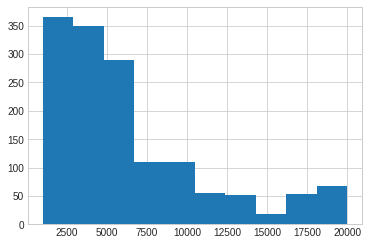

In [81]:
df['MonthlyIncome'].hist()

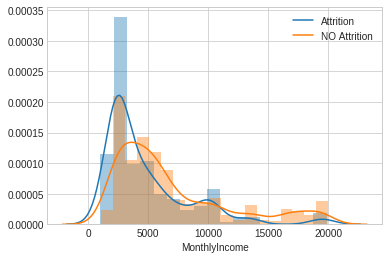

In [82]:
sns.distplot(df.loc[df['Attrition'] == 1]['MonthlyIncome'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['MonthlyIncome'], kde_kws={'label': 'NO Attrition'});

# higher salaried people lower the attrition 


In [83]:
df_con['MonthlyIncome']=df['MonthlyIncome']

In [84]:
df_bin['MonthlyIncome']=pd.cut(df['MonthlyIncome'], bins =5)

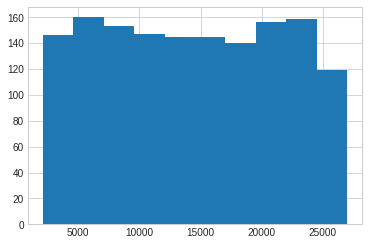

In [85]:
df['MonthlyRate'].hist()

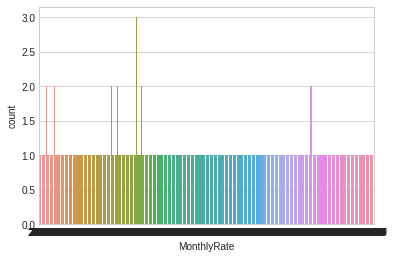

In [86]:
sns.countplot(df['MonthlyRate'])

In [87]:
df['MonthlyRate'].value_counts().head(15)

4223     3
9150     3
6670     2
7324     2
4658     2
21534    2
16154    2
13008    2
12355    2
6069     2
2125     2
19373    2
2755     2
9129     2
20284    2
Name: MonthlyRate, dtype: int64

In [88]:
df_con['MonthlyRate']=df['MonthlyRate']
df_bin['MonthlyRate']=pd.cut(df['MonthlyRate'], bins = 5)

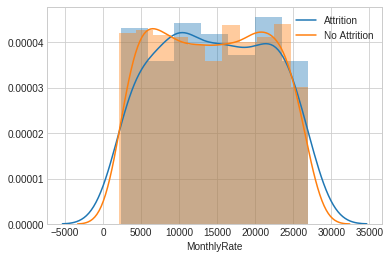

In [89]:
sns.distplot(df.loc[df['Attrition'] == 1]['MonthlyRate'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['MonthlyRate'], kde_kws={'label': 'No Attrition'});

# distribtion shows similar patern for Monthly rate

In [90]:
df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

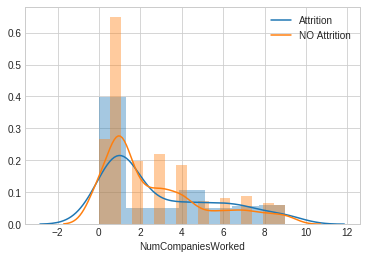

In [91]:
sns.distplot(df.loc[df['Attrition'] == 1]['NumCompaniesWorked'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['NumCompaniesWorked'], kde_kws={'label': 'NO Attrition'});

# more the No. of company worked more the chances of attrition 

In [92]:
df_con['NumCompaniesWorked']=df['NumCompaniesWorked']

In [93]:
df_bin['NumCompaniesWorked']= pd.cut(df['NumCompaniesWorked'],bins=3)

In [94]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

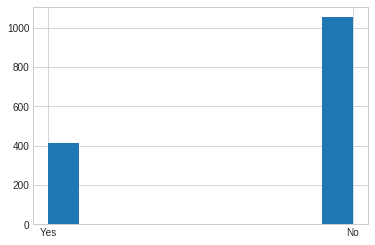

In [95]:
df['OverTime'].hist()

In [96]:
df_con['OverTime']=df['OverTime']

In [97]:
df_bin['OverTime'] = df['OverTime']
df_bin['OverTime']= np.where(df_bin['OverTime'] == 'Yes', 1, 0)

In [98]:
df['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

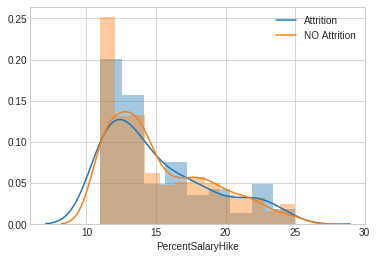

In [99]:
sns.distplot(df.loc[df['Attrition'] == 1]['PercentSalaryHike'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['PercentSalaryHike'], kde_kws={'label': 'NO Attrition'});

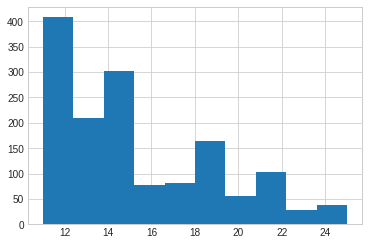

In [100]:
df['PercentSalaryHike'].hist()

In [101]:
df_con['PercentSalaryHike']=df['PercentSalaryHike']

In [102]:
df_bin['PercentSalaryHike']= pd.cut(df['PercentSalaryHike'],bins= 3)

In [103]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

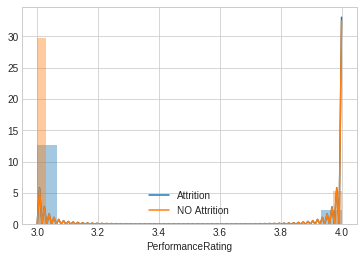

In [104]:
sns.distplot(df.loc[df['Attrition'] == 1]['PerformanceRating'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['PerformanceRating'], kde_kws={'label': 'NO Attrition'});

In [105]:
df_con['PerformanceRating']=df['PerformanceRating']
df_bin['PerformanceRating']=df['PerformanceRating']

In [106]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

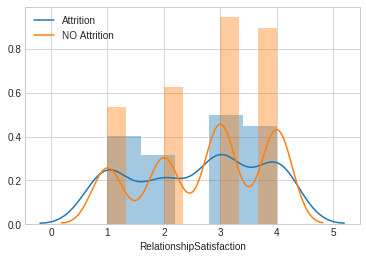

In [107]:
sns.distplot(df.loc[df['Attrition'] == 1]['RelationshipSatisfaction'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['RelationshipSatisfaction'], kde_kws={'label': 'NO Attrition'});

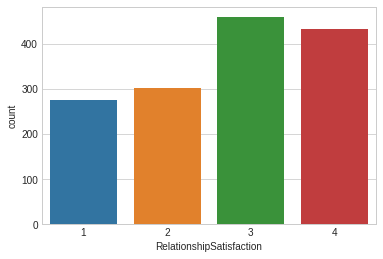

In [108]:
sns.countplot(df['RelationshipSatisfaction'])

In [109]:
df_con['RelationshipSatisfaction']=df['RelationshipSatisfaction']
df_bin['RelationShipSatisfaction']=df['RelationshipSatisfaction']

In [110]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

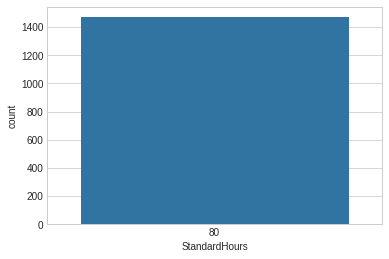

In [111]:
sns.countplot(df['StandardHours'])

## StandardHours are common to all so not included in df_con

In [112]:
df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

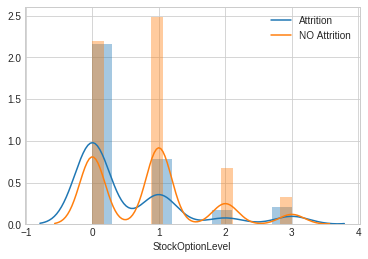

In [113]:
sns.distplot(df.loc[df['Attrition'] == 1]['StockOptionLevel'], kde_kws={'label': 'Attrition'});
sns.distplot(df.loc[df['Attrition'] == 0]['StockOptionLevel'], kde_kws={'label': 'NO Attrition'});

# graph shows that for 0 'stock option level' more attrition 

In [114]:
df_con['StockOptionLevel']= df['StockOptionLevel']
df_bin['StockOptionLevel']=df['StockOptionLevel']

In [115]:
df['TotalWorkingYears'].value_counts()

10    202
6     125
8     103
9      96
5      88
1      81
7      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

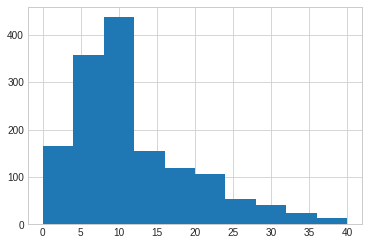

In [116]:
df['TotalWorkingYears'].hist()

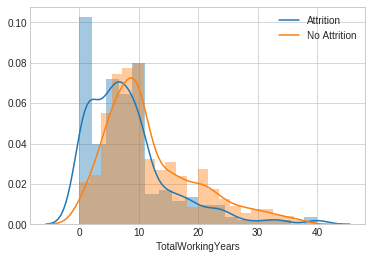

In [117]:
sns.distplot(df.loc[df['Attrition'] == 1]['TotalWorkingYears'], kde_kws={'label': 'Attrition'});

sns.distplot(df.loc[df['Attrition'] == 0]['TotalWorkingYears'], kde_kws={'label': 'No Attrition'});


# graph shows lower experience people tends to attrition
# we may bin the data as 0-10, 10- 20, 20-30 and 30-40


In [118]:
df_con['TotalWorkingYears']= df['TotalWorkingYears']
df_bin['TotalWorkingYears'] = pd.cut(df['TotalWorkingYears'],bins=4)

In [119]:
df['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

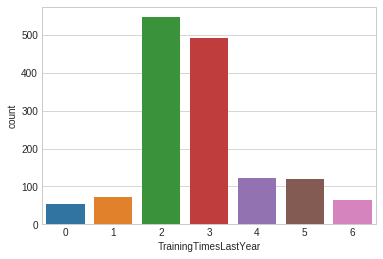

In [120]:
sns.countplot(df['TrainingTimesLastYear'])

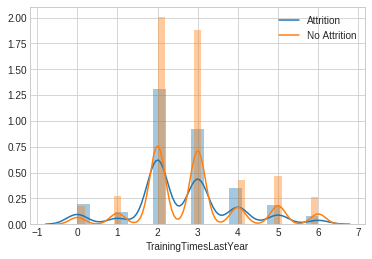

In [121]:
sns.distplot(df.loc[df['Attrition'] == 1]['TrainingTimesLastYear'], kde_kws={'label': 'Attrition'});

sns.distplot(df.loc[df['Attrition'] == 0]['TrainingTimesLastYear'], kde_kws={'label': 'No Attrition'});


#   those who have 0 training tends to attrition 

In [122]:
df_con['TrainingTimesLastYear'] = df['TrainingTimesLastYear']
df_bin['TrainingTimesLastYear']= pd.cut(df['TrainingTimesLastYear'],bins=4)

In [123]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

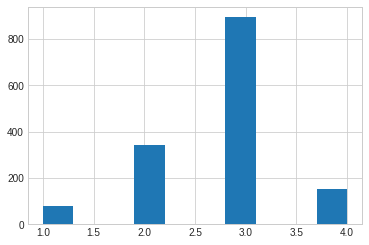

In [124]:
df['WorkLifeBalance'].hist()

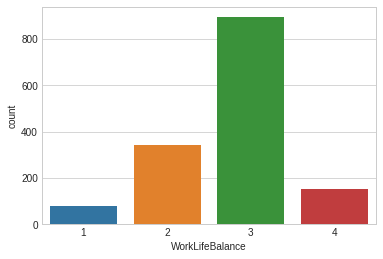

In [125]:
sns.countplot(df['WorkLifeBalance'])

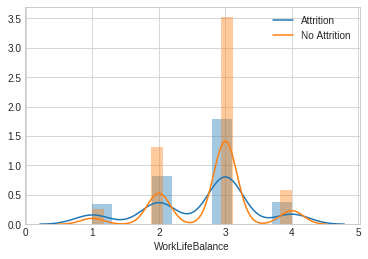

In [126]:
sns.distplot(df.loc[df['Attrition'] == 1]['WorkLifeBalance'], kde_kws={'label': 'Attrition'});

sns.distplot(df.loc[df['Attrition'] == 0]['WorkLifeBalance'], kde_kws={'label': 'No Attrition'});


# person with lowe worklifebalance tends to attrition 

In [127]:

df_con['WorkLifeBalance']=df['WorkLifeBalance']
df_bin['WorkLifeBalance']= df['WorkLifeBalance']

In [128]:
df['YearsAtCompany'].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

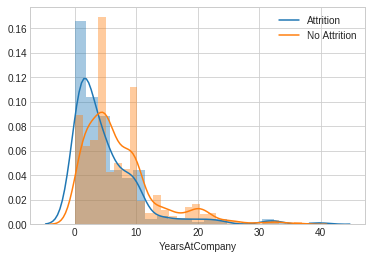

In [129]:
sns.distplot(df.loc[df['Attrition'] == 1]['YearsAtCompany'], kde_kws={'label': 'Attrition'});

sns.distplot(df.loc[df['Attrition'] == 0]['YearsAtCompany'], kde_kws={'label': 'No Attrition'});

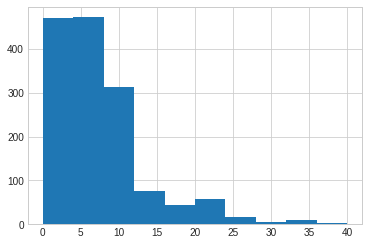

In [130]:
df['YearsAtCompany'].hist()

# attrition chances minimizes as yearsatcompany increases , we may bean it as 10,20,30,40

In [131]:
df_con['YearsAtCompany']=df['YearsAtCompany']
df_bin['YearsAtCompany']=pd.cut(df['YearsAtCompany'],bins = 4)

In [132]:
df['YearsInCurrentRole'].value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

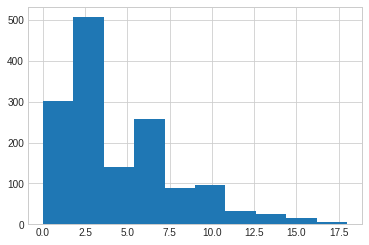

In [133]:
df['YearsInCurrentRole'].hist()

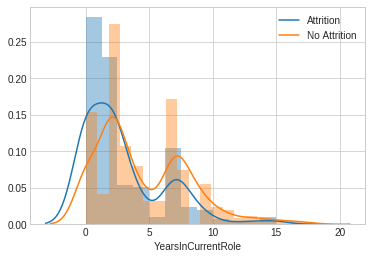

In [134]:
sns.distplot(df.loc[df['Attrition'] == 1]['YearsInCurrentRole'], kde_kws={'label': 'Attrition'});

sns.distplot(df.loc[df['Attrition'] == 0]['YearsInCurrentRole'], kde_kws={'label': 'No Attrition'});

# graph shows more probability to of attrition if employee recenty placed on current role

In [135]:
df_con['YearsInCurrentRole']=df['YearsInCurrentRole']

In [136]:
df['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

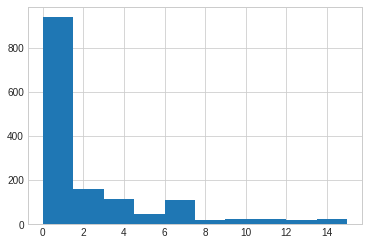

In [137]:
df['YearsSinceLastPromotion'].hist()

# maximum people got promotion recenlty 

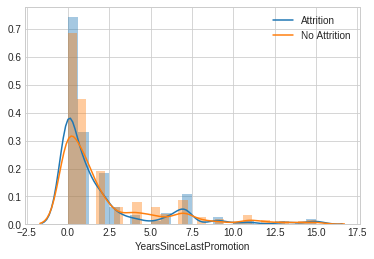

In [138]:
sns.distplot(df.loc[df['Attrition'] == 1]['YearsSinceLastPromotion'], kde_kws={'label': 'Attrition'});

sns.distplot(df.loc[df['Attrition'] == 0]['YearsSinceLastPromotion'], kde_kws={'label': 'No Attrition'});

# distribution shows people who got recent promotion are tends to attrition 

In [139]:
df_con['YearsSinceLastPromotion']=df['YearsSinceLastPromotion']
df_bin['YearsSinceLastPromotion'] = pd.cut(df['YearsSinceLastPromotion'],bins = 5)

In [140]:
df['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

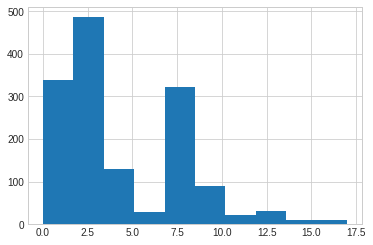

In [141]:
df['YearsWithCurrManager'].hist()

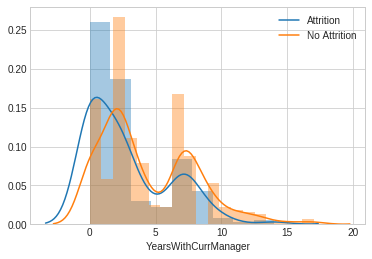

In [142]:
sns.distplot(df.loc[df['Attrition'] == 1]['YearsWithCurrManager'], kde_kws={'label': 'Attrition'});

sns.distplot(df.loc[df['Attrition'] == 0]['YearsWithCurrManager'], kde_kws={'label': 'No Attrition'});

# graph shows lower the YearsWithCurrManager attrition chances are more

In [143]:
df_con['YearsWithCurrManager']=df['YearsWithCurrManager']
df_bin['YearsWithCurrManager']= pd.cut(df['YearsWithCurrManager'], bins = 4)

In [144]:
df_bin.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationShipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,1,"(32.0, 46.0]",Travel_Rarely,"(940.2, 1219.6]",Sales,"(0.972, 10.333]",2,Life Sciences,2,1,...,"(10.986, 15.667]",3,1,0,"(-0.04, 10.0]","(-0.006, 1.5]",1,"(-0.04, 10.0]","(-0.015, 3.0]","(4.25, 8.5]"
2,0,"(46.0, 60.0]",Travel_Frequently,"(100.603, 381.4]",Research & Development,"(0.972, 10.333]",1,Life Sciences,3,0,...,"(20.333, 25.0]",4,4,1,"(-0.04, 10.0]","(1.5, 3.0]",3,"(-0.04, 10.0]","(-0.015, 3.0]","(4.25, 8.5]"
4,1,"(32.0, 46.0]",Travel_Rarely,"(1219.6, 1499.0]",Research & Development,"(0.972, 10.333]",2,Other,4,0,...,"(10.986, 15.667]",3,2,0,"(-0.04, 10.0]","(1.5, 3.0]",3,"(-0.04, 10.0]","(-0.015, 3.0]","(-0.017, 4.25]"
5,0,"(32.0, 46.0]",Travel_Frequently,"(1219.6, 1499.0]",Research & Development,"(0.972, 10.333]",4,Life Sciences,4,1,...,"(10.986, 15.667]",3,3,0,"(-0.04, 10.0]","(1.5, 3.0]",3,"(-0.04, 10.0]","(-0.015, 3.0]","(-0.017, 4.25]"
7,0,"(17.958, 32.0]",Travel_Rarely,"(381.4, 660.8]",Research & Development,"(0.972, 10.333]",1,Medical,1,0,...,"(10.986, 15.667]",3,4,1,"(-0.04, 10.0]","(1.5, 3.0]",3,"(-0.04, 10.0]","(-0.015, 3.0]","(-0.017, 4.25]"


In [145]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Attrition')

In [146]:
df_bin_enc=pd.get_dummies(df_bin,columns=one_hot_cols)

In [147]:
one_hot_cols

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationShipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [148]:
df_bin_enc.head()

,Attrition,"Age_(17.958, 32.0]","Age_(32.0, 46.0]","Age_(46.0, 60.0]",BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,"DailyRate_(100.603, 381.4]","DailyRate_(381.4, 660.8]","DailyRate_(660.8, 940.2]",...,"YearsAtCompany_(30.0, 40.0]","YearsSinceLastPromotion_(-0.015, 3.0]","YearsSinceLastPromotion_(3.0, 6.0]","YearsSinceLastPromotion_(6.0, 9.0]","YearsSinceLastPromotion_(9.0, 12.0]","YearsSinceLastPromotion_(12.0, 15.0]","YearsWithCurrManager_(-0.017, 4.25]","YearsWithCurrManager_(4.25, 8.5]","YearsWithCurrManager_(8.5, 12.75]","YearsWithCurrManager_(12.75, 17.0]"
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [149]:
df_bin.dtypes

Attrition                      int64
Age                         category
BusinessTravel              category
DailyRate                   category
Department                  category
DistanceFromHome            category
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                         int64
HourlyRate                  category
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome               category
MonthlyRate                 category
NumCompaniesWorked          category
OverTime                       int64
PercentSalaryHike           category
PerformanceRating              int64
RelationShipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears           category
TrainingTimesLastYear       category
WorkLifeBalance                int64
Y

In [150]:
y = df_bin['Attrition']

In [151]:
x= df_bin_enc

In [152]:
x= x.drop('Attrition',axis =1)

In [153]:
x.head()

,"Age_(17.958, 32.0]","Age_(32.0, 46.0]","Age_(46.0, 60.0]",BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,"DailyRate_(100.603, 381.4]","DailyRate_(381.4, 660.8]","DailyRate_(660.8, 940.2]","DailyRate_(940.2, 1219.6]",...,"YearsAtCompany_(30.0, 40.0]","YearsSinceLastPromotion_(-0.015, 3.0]","YearsSinceLastPromotion_(3.0, 6.0]","YearsSinceLastPromotion_(6.0, 9.0]","YearsSinceLastPromotion_(9.0, 12.0]","YearsSinceLastPromotion_(12.0, 15.0]","YearsWithCurrManager_(-0.017, 4.25]","YearsWithCurrManager_(4.25, 8.5]","YearsWithCurrManager_(8.5, 12.75]","YearsWithCurrManager_(12.75, 17.0]"
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [154]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.66,
                                            test_size = 0.34, random_state = 0)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 117)
(500, 117)
(970,)
(500,)


In [156]:
# Fitting logistic regression
log_mod = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression   classifier on training set: {:.4f}'
        .format(log_mod.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
        .format(log_mod.score(X_test, y_test)))


/home/savita/anaconda3/envs/Python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression   classifier on training set: 0.9041
Accuracy of Logistic regression classifier on test set: 0.8920


## Machine Learning algorithms 

In [157]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


##  Function for fitting machine learning algoritm

In [158]:
# Function for Fitting all the machine learning algorithm with cross validation 
def fit_ml_algo(algo, X_train,y_train,cv=10):
    #One pass 
    model = algo.fit(X_train,y_train)
    #One pass accuracy
    acc=round(model.score(X_train,y_train)*100,2)
    #Cross Validation
    train_pred = model_selection.cross_val_predict(algo,
                                                   X_train,
                                                  y_train,
                                                  cv=cv,
                                                  n_jobs=-1)
    #Cross-validation accuracy metric
    acc_cv= round(metrics.accuracy_score(y_train,train_pred)*100,2)    
    
    return train_pred,acc,acc_cv

# Logistic Regression 

In [159]:

start_time=time.time()
train_pred_log, acc_log,acc_cv_log= fit_ml_algo(LogisticRegression(),
                                               X_train,
                                               y_train)
log_time = (time.time()-start_time)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

/home/savita/anaconda3/envs/Python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 90.41
Accuracy CV 10-Fold: 85.57
Running Time: 0:00:58.651964


## KNN

In [160]:
start_time= time.time()
train_pred_knn,acc_knn,acc_cv_knn=fit_ml_algo(KNeighborsClassifier(),
                                             X_train,
                                             y_train)
knn_time= (time.time()-start_time)
print("Accuracy:%s" %acc_knn)
print("Accuracy CV 10 -Fold: %s" %acc_cv_knn)
print("Running time %s"%datetime.timedelta(seconds=log_time))

Accuracy:86.8
Accuracy CV 10 -Fold: 84.02
Running time 0:00:58.651964


## Guassian NB

In [161]:
start_time = time.time()
traun_pred_gaussian,acc_gaussian,acc_cv_gaussian=fit_ml_algo(GaussianNB(),
                                                            X_train,
                                                            y_train)
gaussian_time=(time.time()-start_time)
print("Accuracy:%s" %acc_gaussian)
print("Accuracy CV 10 -Fold: %s" %acc_cv_gaussian)
print("Running time %s"%datetime.timedelta(seconds=log_time))


##### Received very bad results ##############

Accuracy:42.37
Accuracy CV 10 -Fold: 40.62
Running time 0:00:58.651964


# Linear SVC

In [162]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 90.21
Accuracy CV 10-Fold: 85.88
Running Time: 0:00:01.681136


## # Decision Tree Classifier

In [163]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))


#### Accuracy is 100 % ... why ??

Accuracy: 100.0
Accuracy CV 10-Fold: 80.82
Running Time: 0:00:02.368955


## SGDClassifier

In [164]:

start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 89.28
Accuracy CV 10-Fold: 83.4
Running Time: 0:00:01.008791


# Gradient Boosting Trees

In [165]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 95.36
Accuracy CV 10-Fold: 86.7
Running Time: 0:00:07.776677


In [166]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,  
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
    ]})
print("---Cross Validation Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Cross Validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,86.70
4,Linear SVC,85.88
1,Logistic Regression,85.57
0,KNN,84.02
3,Stochastic Gradient Decent,83.40
5,Decision Tree,80.82
2,Naive Bayes,40.62
